In [1]:
import torch

from torch import nn
from torch.nn import functional as F
from torch import optim
from torchvision import datasets





In [2]:
######################################################################


noisy_imgs_1 , noisy_imgs_2 = torch.load('./data/train_data.pkl') # torch.Size([50000, 3, 32, 32]) 
noisy_imgs , clean_imgs = torch.load('./data/val_data.pkl')# torch.Size([1000, 3, 32, 32])
noisy_imgs = noisy_imgs.float()/255
noisy_imgs_1 = noisy_imgs_1.float()
noisy_imgs_2 = noisy_imgs_2.float()
clean_imgs = clean_imgs.float()/255


mu, std = noisy_imgs.mean(), noisy_imgs.std()
noisy_imgs.sub_(mu).div_(std)


mu, std = noisy_imgs_1.mean(), noisy_imgs_1.std()
noisy_imgs_1.sub_(mu).div_(std)

mu, std = noisy_imgs_2.mean(), noisy_imgs_2.std()
noisy_imgs_2.sub_(mu).div_(std)



mu, std = clean_imgs.mean(), clean_imgs.std()
clean_imgs.sub_(mu).div_(std)


######################################################################


tensor([[[[ 0.9086,  0.8306,  0.6901,  ...,  1.5018,  1.5642,  1.5954],
          [ 0.6745,  0.5965,  0.8150,  ...,  1.5174,  1.4861,  1.4861],
          [ 0.6433,  0.5809,  0.4404,  ...,  1.6110,  1.5642,  1.5330],
          ...,
          [ 0.2843,  0.2531,  0.3155,  ..., -0.5585,  0.2687,  0.1751],
          [ 0.2999,  0.1282,  0.3468,  ...,  0.2219,  0.2375,  0.0034],
          [ 0.2999,  0.2219,  0.2843,  ...,  0.1907,  0.1595,  0.1751]],

         [[ 0.5028,  0.4404,  0.1595,  ...,  1.4393,  1.5174,  1.5486],
          [ 0.5497,  0.4404,  0.6277,  ...,  1.4549,  1.3925,  1.4237],
          [ 0.5653,  0.4872,  0.3468,  ...,  1.5642,  1.4861,  1.4861],
          ...,
          [ 0.2531,  0.2219,  0.2999,  ..., -0.8239, -0.2464, -0.1683],
          [ 0.2687,  0.0970,  0.3155,  ..., -0.3244, -0.2620, -0.3400],
          [ 0.2531,  0.1907,  0.2219,  ..., -0.1839, -0.1995, -0.2464]],

         [[ 0.3468,  0.3468,  0.1595,  ...,  1.5174,  1.5954,  1.6422],
          [ 0.5340,  0.3780,  

In [2]:
class Model(nn.Module):
    nb_epochs = 40
    lr = 1e-3
    
    def __init__(self):
        ##instantiate model + optimizer + loss function + any other stuff you need
        super().__init__()
        lr = 1e-3
        self.nb_epochs = 40
        self.nb_samples = 1000
        self.result = torch.empty(self.nb_epochs)
        self.prediction = torch.empty(self.nb_samples, 3, 32, 32)
        
        
        
        #model autoencoder
        self.autoencoder = nn.Sequential(
            nn.Conv2d(3, 10, kernel_size = 5, padding = (5 - 1) // 2),
            nn.ReLU(),
            nn.Conv2d(10, 10, kernel_size = 5, padding = (5 - 1) // 2),
            nn.ReLU(),
            nn.Conv2d(10, 3, kernel_size = 5, padding = (5 - 1) // 2)    
        )
        
        #optimizer
        self.optimizer = optim.Adam(self.autoencoder.parameters(), lr)
        self.criterion = nn.CrossEntropyLoss()
        pass
    
    def load_pretrained_model(self):
        ## This loads the parameters saved in bestmodel .pth into the model
        pass
    
    
    def train(self, train_input, train_target):
        #: train˙input : tensor of size (N, C, H, W) containing a noisy version of the images
        #: train˙target : tensor of size (N, C, H, W) containing another noisy version of the 
        # same_images , which only differs from the input by their noise .
        
        
        for epoch in range(self.nb_epochs):
            
            #Print information of the epochs
            if not epoch % 5: 
                print('epoch:', epoch)
            if epoch > 0:
                print(self.result[epoch])
                
            #learning
            for n in range(self.nb_samples):
                
                output = self.autoencoder(noisy_imgs[n:n+1]) # torch.Size([1, 3, 32, 32]) 
                #print(self.prediction[n:n+1].shape)
                #print(n)
                
                if epoch == self.nb_epochs:
                    self.prediction[n:n+1] = output
                
                loss = self.criterion(output,clean_imgs[n:n+1])
                if n > 998:
                    print('loss:', loss)
                    
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
            
            
            
            self.result[epoch] = loss
           
            
        return self.result
    
    
    def predict(self , test_input) :
        #return torch.Tensor
        return self.resul


In [4]:
### For mini - project 1
def psnr(denoised, ground_truth):
    # Peak Signal to Noise Ratio : denoised and ground˙truth have range [0 , 1]
    mse = torch.mean (( denoised - ground_truth ) ** 2)
    return -10 * torch.log10 ( mse + 10** -8)

In [5]:

    model = Model()
    loss = model.train(noisy_imgs,clean_imgs)
    


epoch: 0
loss: tensor(-2373404., grad_fn=<DivBackward1>)
tensor(6.2449e-39, grad_fn=<SelectBackward0>)
loss: tensor(-16330433., grad_fn=<DivBackward1>)
tensor(9.0919e-39, grad_fn=<SelectBackward0>)
loss: tensor(-46946608., grad_fn=<DivBackward1>)
tensor(1.0010e-38, grad_fn=<SelectBackward0>)
loss: tensor(-96757792., grad_fn=<DivBackward1>)
tensor(1.0102e-38, grad_fn=<SelectBackward0>)
loss: tensor(-1.6780e+08, grad_fn=<DivBackward1>)
epoch: 5
tensor(1.0561e-38, grad_fn=<SelectBackward0>)
loss: tensor(-2.6210e+08, grad_fn=<DivBackward1>)
tensor(6.3368e-39, grad_fn=<SelectBackward0>)
loss: tensor(-3.8177e+08, grad_fn=<DivBackward1>)
tensor(6.4286e-39, grad_fn=<SelectBackward0>)
loss: tensor(-5.2895e+08, grad_fn=<DivBackward1>)
tensor(8.4490e-39, grad_fn=<SelectBackward0>)
loss: tensor(-7.0582e+08, grad_fn=<DivBackward1>)
tensor(5.9694e-39, grad_fn=<SelectBackward0>)
loss: tensor(-9.1456e+08, grad_fn=<DivBackward1>)
epoch: 10
tensor(7.7143e-39, grad_fn=<SelectBackward0>)
loss: tensor(-1.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Computing 
torch.Size([3, 32, 32])
tensor(48.0152)


<Figure size 432x288 with 0 Axes>

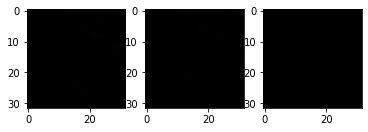

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()


print('Computing ')



#plt.imshow(clean_imgs[1].permute(1,2,0).numpy())




img_noisy = noisy_imgs[2].permute(1,2,0)
img_clean = clean_imgs[2].permute(1,2,0)
img_predict = model.prediction[2].permute(1,2,0)
print(model.prediction[2].shape)


img_noisy = img_noisy/255
img_clean = img_clean/255
img_predict = img_predict/255

decibel_value = psnr(model.prediction[2]/255, clean_imgs[2]/255)
print(decibel_value)


fig, axs = plt.subplots(1,3)
axs[0].imshow(img_noisy)

axs[1].imshow(img_clean)

axs[2].imshow(img_predict)

plt.show()




#print(x.mean().detach().numpy())
#plt.plot(x.detach().numpy(), color = 'r')


#plt.show()